In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans


In [7]:
df = pd.read_csv("Electric_Vehicle_Population_Data (1).csv")



In [8]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
5,1G1FZ6S00L,Thurston,Olympia,WA,98506.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,22.0,255186389,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
6,5YJ3E1EA0N,Yakima,Moxee,WA,98936.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,211877725,POINT (-120.39197 46.55621),PACIFICORP,5.307700e+10
7,5YJSA1E29J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,23.0,112582634,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10
8,JN1AZ0CPXB,Thurston,Olympia,WA,98512.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,35.0,144417262,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
9,KNDCM3LD1J,King,Seattle,WA,98103.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,36.0,333286894,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [9]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,269662.000000,269673.000000,269669.000000,269669.000000,269009.000000,2.696730e+05,2.696620e+05
mean,98174.302260,2021.925832,40.751692,663.101079,28.851436,2.434417e+08,5.297165e+10
std,2590.609215,3.050066,79.604176,6790.627969,14.894449,6.461834e+07,1.632722e+09
min,1030.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.190569e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.610981e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,0.000000,42.000000,2.768459e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


In [10]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                11
City                                                  11
State                                                  0
Postal Code                                           11
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         4
Base MSRP                                              4
Legislative District                                 664
DOL Vehicle ID                                         0
Vehicle Location                                      89
Electric Utility                                      11
2020 Census Tract                                     11
dtype: int64


In [11]:
#fiiling missing number
df['Postal Code'] = df['Postal Code'].fillna(0)
df['Electric Range'] = df['Electric Range'].fillna(0)
df['Base MSRP'] = df['Base MSRP'].fillna(0)
df['Legislative District'] = df['Legislative District'].fillna(0)
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(0)

# Check result
print(df.isnull().sum())



VIN (1-10)                                            0
County                                               11
City                                                 11
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     89
Electric Utility                                     11
2020 Census Tract                                     0
dtype: int64


In [12]:
#filling missing text
df['County'] = df['County'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Electric Utility'] = df['Electric Utility'].fillna('Unknown')
print(df.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [13]:
#Feature selection
X = df[['Model Year', 'Base MSRP', 'Legislative District']]
y = df['Electric Range']
    
print(X.head())
print(y.head())



   Model Year  Base MSRP  Legislative District
0        2016        0.0                  14.0
1        2020        0.0                  47.0
2        2018        0.0                  36.0
3        2020        0.0                  46.0
4        2018        0.0                  22.0
0     84.0
1    203.0
2    215.0
3    291.0
4    238.0
Name: Electric Range, dtype: float64


In [14]:
#cont with linear Reg

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
#train model
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
#make pred (Range mile) 
y_pred = lr.predict(X_test)
print("Sample Predictions:", y_pred[:5])


Sample Predictions: [96.35369606 11.28114441 68.17045906 96.1445598  53.60828398]


In [17]:
#compare
result = pd.DataFrame({
    "Actual Range": y_test.values[:5],
    "Predicted Range": y_pred[:5]
})
print(result)


   Actual Range  Predicted Range
0         238.0        96.353696
1           0.0        11.281144
2         259.0        68.170459
3         215.0        96.144560
4          42.0        53.608284


In [18]:
#check accuracy
print("Linear Regression Accuracy:", lr.score(X_test, y_test))



Linear Regression Accuracy: 0.29456024854500507


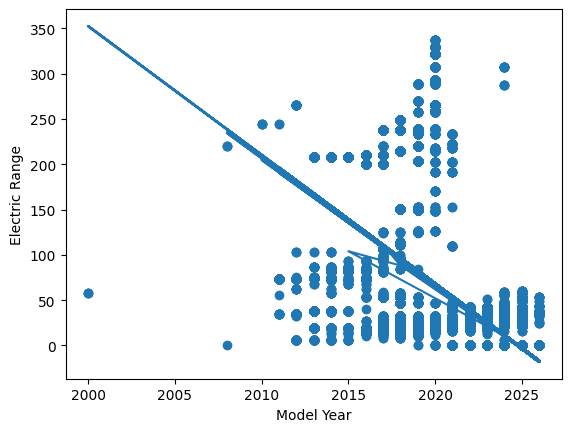

In [19]:
plt.scatter(X_test['Model Year'], y_test)
plt.plot(X_test['Model Year'], y_pred)
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()


In [20]:
#NOW polynomial Regression


In [21]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

lr_poly = LinearRegression()
lr_poly.fit(X_train_p, y_train_p)

y_poly_pred = lr_poly.predict(X_test_p)

print("Polynomial Regression Accuracy:", lr_poly.score(X_test_p, y_test_p))

Polynomial Regression Accuracy: 0.29887577224387607


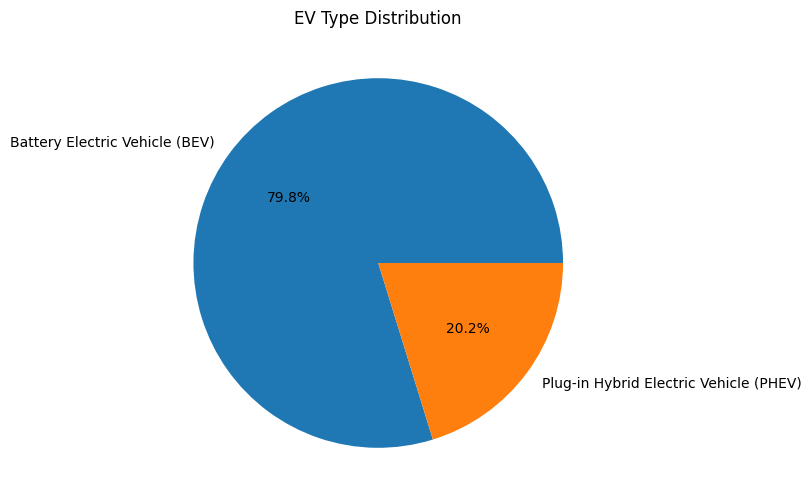

In [42]:
plt.figure(figsize=(6,6))
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("EV Type Distribution")
plt.ylabel("")   # removes default y-label
plt.show()


In [22]:
#KNN classifier


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_knn_pred)
print("Confusion Matrix:\n", cm)

KNN Accuracy: 0.6918513024937425
Confusion Matrix:
 [[33663     0     0 ...     2     0     0]
 [    4     0     0 ...     0     0     0]
 [    3     0    33 ...     0     0     0]
 ...
 [    0     0     0 ...    32     0     0]
 [    0     0     0 ...     9     0     0]
 [    0     0     0 ...     1     0     0]]


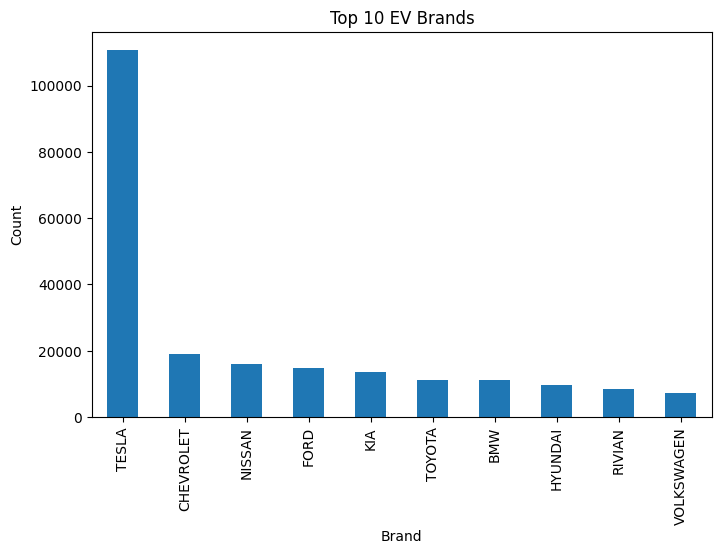

In [38]:
plt.figure(figsize=(8,5))
df['Make'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 EV Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


In [24]:
#Acuu compar


In [25]:
linear_acc = lr.score(X_test, y_test)
poly_acc = lr_poly.score(X_test_p, y_test_p)
knn_acc = accuracy_score(y_test, y_knn_pred)

print("\n--- MODEL COMPARISON ---")
print("Linear Accuracy:", linear_acc)
print("Polynomial Accuracy:", poly_acc)
print("KNN Accuracy:", knn_acc)


--- MODEL COMPARISON ---
Linear Accuracy: 0.29456024854500507
Polynomial Accuracy: 0.29887577224387607
KNN Accuracy: 0.6918513024937425


In [26]:
#    Logistic Regression
# Features and target
X_log = df[['Model Year', 'Electric Range']]
y_log = df['Electric Vehicle Type']

# Convert text labels to numbers
y_log = pd.factorize(y_log)[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prediction and accuracy
y_log_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_log_pred))

Logistic Regression Accuracy: 0.8082692129415037


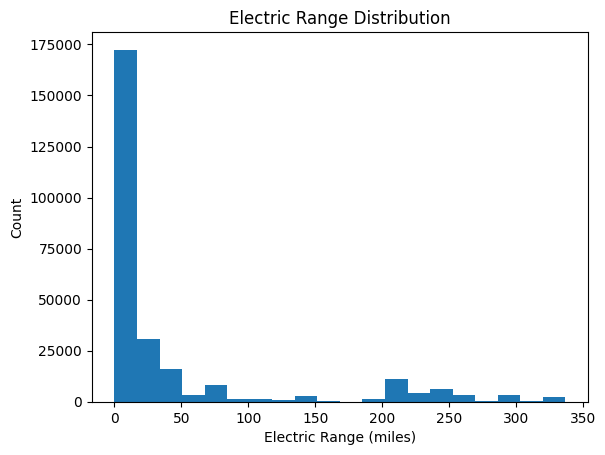

In [44]:
df['Electric Range'].plot(kind='hist', bins=20)
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()


In [28]:
#     Decision Tree

# Predict Electric Range
X_tree = df[['Model Year', 'Base MSRP']]
y_tree = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_tree_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))


Decision Tree Accuracy: 0.7400718987901176


In [29]:
     #K-Means Clustering
# Select features
X_cluster = df[['Model Year', 'Electric Range']]

# Create and fit model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)

# Add cluster labels
df['Cluster'] = kmeans.labels_

print(df[['Model Year', 'Electric Range', 'Cluster']].head())


   Model Year  Electric Range  Cluster
0        2016            84.0        0
1        2020           203.0        2
2        2018           215.0        2
3        2020           291.0        1
4        2018           238.0        2


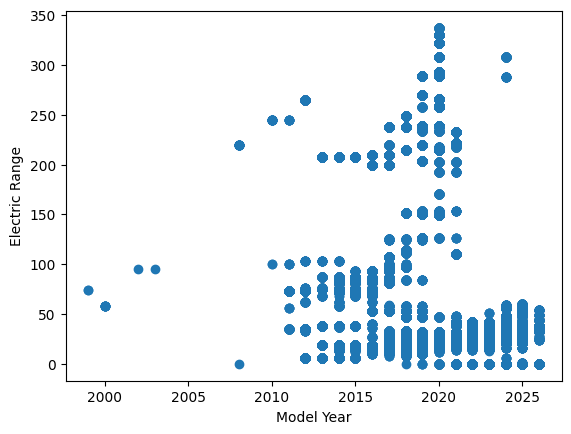

In [34]:
plt.scatter(df['Model Year'], df['Electric Range'])
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()


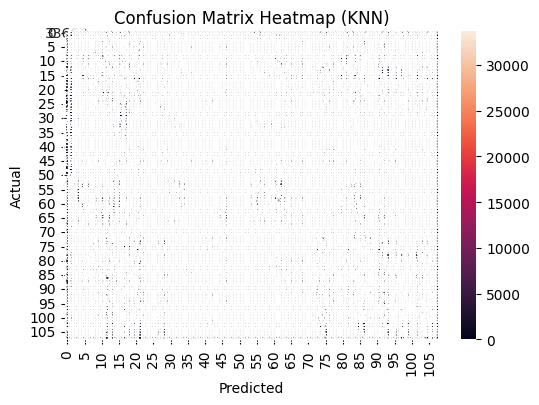

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix Heatmap (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
# Final Model Comparison
models = ['Linear', 'Polynomial', 'KNN', 'Logistic', 'Decision Tree']
accuracies = [linear_acc, poly_acc, knn_acc, 
              accuracy_score(y_test, y_log_pred), 
              dt.score(X_test, y_test)]

comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies
})

print(comparison)

# Best model
best_model = comparison.loc[comparison['Accuracy'].idxmax()]
print("\nBest Model is:", best_model['Model'], 
      "with Accuracy:", best_model['Accuracy'])


           Model  Accuracy
0         Linear  0.294560
1     Polynomial  0.298876
2            KNN  0.691851
3       Logistic  0.626662
4  Decision Tree  0.740072

Best Model is: Decision Tree with Accuracy: 0.7400718987901176


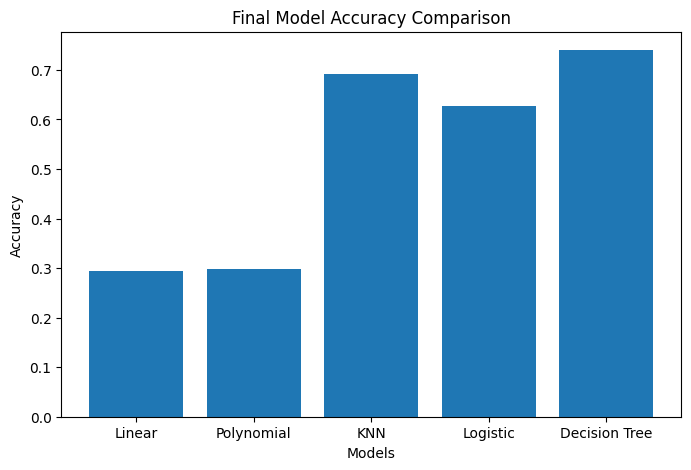

In [46]:
plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Final Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()
